In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Parametros do sistema
eta_min = 0
d_eta = 0.1
eta_max = 10
eta_linspace = np.arange(eta_min, eta_max, d_eta)

# Vetores do sistema
f = np.zeros(len(eta_linspace))
df = np.zeros(len(eta_linspace))
d2f = np.zeros(len(eta_linspace))
d3f = np.zeros(len(eta_linspace))

# Condições iniciais
f[0] = 0
df[0] = 0
d2f[0] = 0.3318 # Valor retirado do exemplo dado. Pode ser encontrado via tentativa e erro.
d3f[0] = 0

for i in range(len(eta_linspace) - 1):
    
    f_ast = (f[i] + df[i] * d_eta)
    df_ast = (df[i] + d2f[i] * d_eta)
    d2f_ast = (d2f[i] + d3f[i] * d_eta)
    d3f_ast = -0.5 * f_ast * d2f_ast

    f_ast_ast = (f[i] + df_ast * d_eta)
    df_ast_ast = (df[i] + d2f_ast * d_eta)
    d2f_ast_ast = (d2f[i] + d3f_ast * d_eta)

    f[i+1] = 0.5 * (f_ast + f_ast_ast)
    df[i+1] = 0.5 * (df_ast + df_ast_ast)
    d2f[i+1] = 0.5 * (d2f_ast + d2f_ast_ast)

    d3f[i+1] = -0.5 * f[i+1] * d2f[i+1]

In [73]:
d2f[-1]

1.7166545409213837e-08

In [45]:
import seaborn as sns

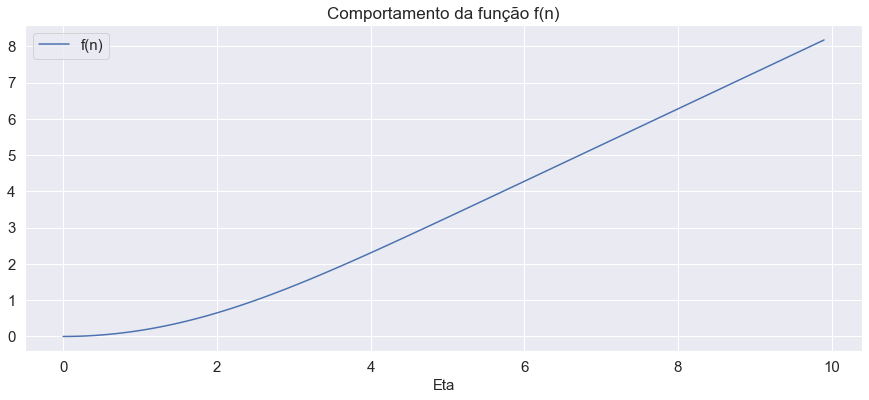

In [71]:
plt.figure(figsize=(15, 6))
sns.set(style="darkgrid")

ax = sns.lineplot(x = eta_linspace, y = f, label = 'f(n)')

ax.legend(fontsize = 15)
ax.set_title('Comportamento da função f(n)', fontsize = 17)
ax.set_xlabel("Eta",fontsize=15)
ax.tick_params(labelsize=15)

plt.savefig('./fn.png')

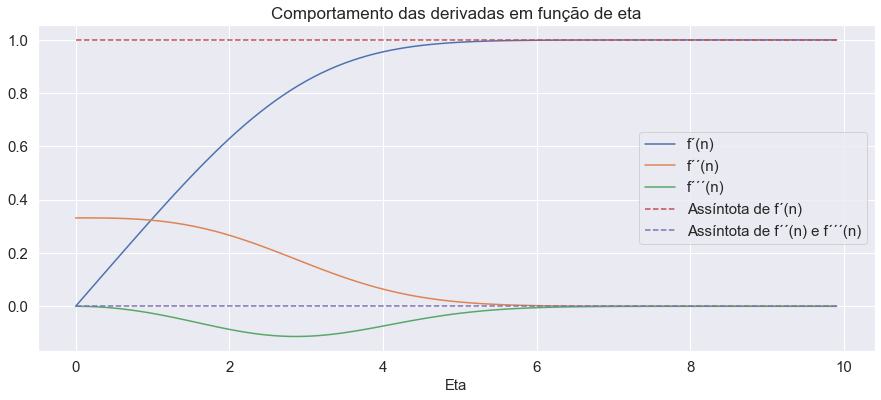

In [72]:
plt.figure(figsize=(15, 6))
sns.set(style="darkgrid")

# ax = sns.lineplot(x = eta_linspace, y = f, label = 'f(n)')
ax = sns.lineplot(x = eta_linspace, y = df, label = "f´(n)")
ax = sns.lineplot(x = eta_linspace, y = d2f, label = "f´´(n)")
ax = sns.lineplot(x = eta_linspace, y = d3f, label = "f´´´(n)")
ax = sns.lineplot(x = eta_linspace, y = np.ones(len(eta_linspace)), label = "Assíntota de f´(n)", dashes = True)
ax = sns.lineplot(x = eta_linspace, y = np.zeros(len(eta_linspace)), label = "Assíntota de f´´(n) e f´´´(n)", dashes = True)
ax.lines[-1].set_linestyle("--")
ax.lines[-2].set_linestyle("--")

ax.legend(fontsize = 15)
ax.set_title('Comportamento das derivadas em função de eta', fontsize = 17)
ax.set_xlabel("Eta",fontsize=15)
ax.tick_params(labelsize=15)

plt.savefig('./derivadas.png')